In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
from sklearn.cluster import KMeans
X = np.array([[1,2],[1,4],[1,0],[10,4],[10,0]])


In [3]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  4],
       [10,  0]])

In [4]:
X.ndim

2

In [5]:
X.shape

(5, 2)

In [7]:
kmeans =  KMeans(n_clusters=3)

In [8]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [9]:
kmeans.labels_ ##the cluster divided into 3

array([0, 0, 0, 1, 2], dtype=int32)

In [12]:
X[:,0]

array([ 1,  1,  1, 10, 10])

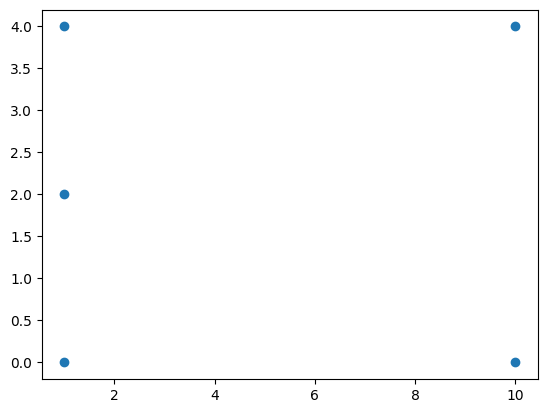

In [13]:
plt.scatter(X[:,0],X[:,1])

In [15]:
data = pd.DataFrame(X)

In [16]:
data

,0,1
0,1,2
1,1,4
2,1,0
3,10,4
4,10,0


In [17]:
pd.DataFrame(kmeans.labels_)

,0
0,0
1,0
2,0
3,1
4,2


In [23]:
datawithlabels = pd.concat([data,pd.DataFrame(kmeans.labels_)],axis = 1,names = [['first','second','cluster']])

In [24]:
datawithlabels

,0,1,0
0,1,2,0
1,1,4,0
2,1,0,0
3,10,4,1
4,10,0,2


In [25]:
kmeans.cluster_centers_

array([[ 1.,  2.],
       [10.,  4.],
       [10.,  0.]])

In [31]:
test_data = np.array([[0,0],[12,3],[20,20],[11,32]])
test_data

array([[ 0,  0],
       [12,  3],
       [20, 20],
       [11, 32]])

In [32]:
kmeans.predict(test_data)

array([0, 1, 1, 1], dtype=int32)

- Try with big data


In [33]:
X,y = make_blobs(n_samples = 1000,centers = 3,n_features = 2,random_state = 10)

In [34]:
X

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]])

In [35]:
y

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

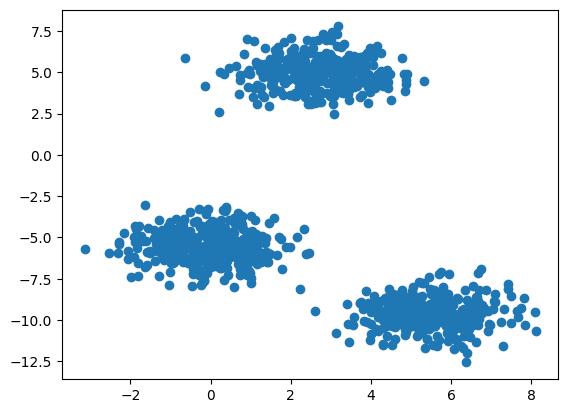

In [36]:
plt.scatter(X[:,0],X[:,1])

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 20)


In [40]:
wcss = []
for k in range(2,11):
  kmeans = KMeans(n_clusters = k,init = "k-means++")
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [41]:
wcss

[6350.4992370301725,
 1230.8405264123755,
 1080.0327142831738,
 940.5716991115866,
 821.0976034869425,
 701.2563587375927,
 606.492159469645,
 528.64824642806,
 487.67533307249784]

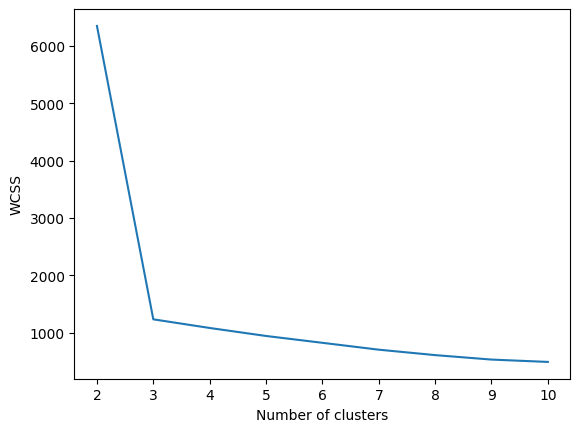

In [44]:
plt.plot(range(2,11),wcss)
plt.ylabel('WCSS')
plt.xlabel('Number of clusters')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [46]:
y_labels = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
X_test

array([[  5.10321163,  -8.92081541],
       [  5.36056502, -11.71667312],
       [  4.86290719,  -8.73013226],
       [  2.00921377,   6.25765149],
       [ -1.27777282,  -3.94440662],
       [  5.36450084, -10.33885397],
       [  2.59241953,   3.7552354 ],
       [ -1.0425438 ,  -4.34296439],
       [  3.02348939,   4.32942137],
       [  3.18484236,   7.76924341],
       [  5.655043  ,  -9.1398234 ],
       [  1.15827745,  -5.56121231],
       [  3.42751962,   3.95127496],
       [  3.41311674,   4.26778771],
       [  4.5261133 , -11.48597475],
       [  5.11358411,  -9.93384293],
       [  2.595353  ,   3.13075128],
       [  0.77544717,  -4.28464225],
       [ -0.87183385,  -4.61183953],
       [  3.54156269, -10.30247323],
       [  7.66827937,  -9.83144813],
       [  1.16967458,  -5.02537784],
       [  5.80380987, -10.09162039],
       [  6.86566659,  -8.20281439],
       [  6.2686376 ,  -9.38138022],
       [ -2.28283435,  -5.29948524],
       [  5.75876281,  -8.44998784],
 

In [49]:
y_labels

array([0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 1,
       2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0,
       2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1,
       0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0,

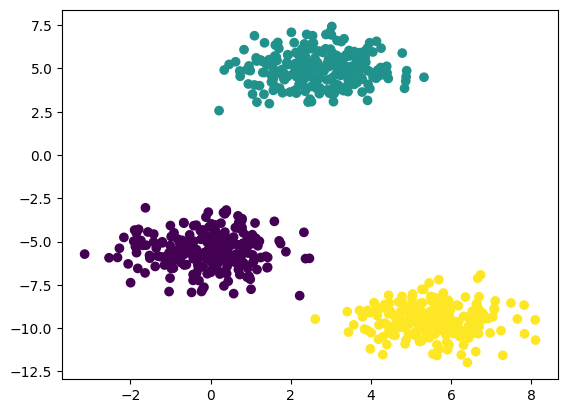

In [52]:
plt.scatter(X_train[:,0],X_train[:,1],c= y_labels)

In [51]:
kmeans.labels_

array([0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 1,
       2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0,
       2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1,
       0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0,

In [55]:
from sklearn.metrics import silhouette_score #

silhoutte_coffients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters = k,init = "k-means++")
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_) # And here
  silhoutte_coffients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [56]:
silhoutte_coffients

[0.7273220153669463,
 0.7835543034796946,
 0.6292597116746109,
 0.4499098425326655,
 0.3129927634252924,
 0.32691670906896503,
 0.3422484575968897,
 0.3481685660040239,
 0.34326390333540213]

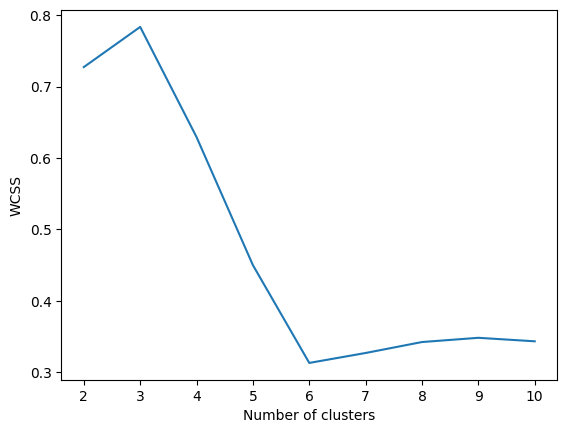

In [58]:
plt.plot(range(2,11),silhoutte_coffients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.show()